In [1]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from itertools import product, combinations

grid size = 0.451 meters (17.75 inches)

3.25 inches & 14 inches

<br/>04: 1.473 meters (58 inches)
<br/>72: 1.422 meters (56 inches)
<br/>73: 1.803 meters (71 inches)
<br/>50: 1.473 meters (58 inches)

Room size = 14 by 14 grids: 6.312 * 6.312 meters (248.5 * 248.5 inches)

Test coordinate system
<br/>50: (0.000, 0.000, 1.473) in meters, (0, 0, 58) in inches
<br/>73: (3.073,-0.356, 1.829) in meters, (121, -14, 72) in inches
<br/>04: (3.607, 3.607, 1.473) in meters, (142, 142, 58) in inches
<br/>72: (0.000, 3.607, 1.422) in meters, (0, 142, 56) in inches

*tag 010-000-033-041: (2.254, 1.803, 0) in meters, (88.75, 71, 0) in inches

# Plot the room extent

In [2]:
# define indices of the room
bottom = np.array(((-1.353, -1.353, 0), (4.961, -1.353, 0), (4.961, 4.961, 0), (-1.353, 4.961, 0)))
bottom

array([[-1.353, -1.353,  0.   ],
       [ 4.961, -1.353,  0.   ],
       [ 4.961,  4.961,  0.   ],
       [-1.353,  4.961,  0.   ]])

In [3]:
top = np.zeros((4, 3))
top[:, 2] += 3
top += bottom
top

array([[-1.353, -1.353,  3.   ],
       [ 4.961, -1.353,  3.   ],
       [ 4.961,  4.961,  3.   ],
       [-1.353,  4.961,  3.   ]])

<IPython.core.display.Javascript object>


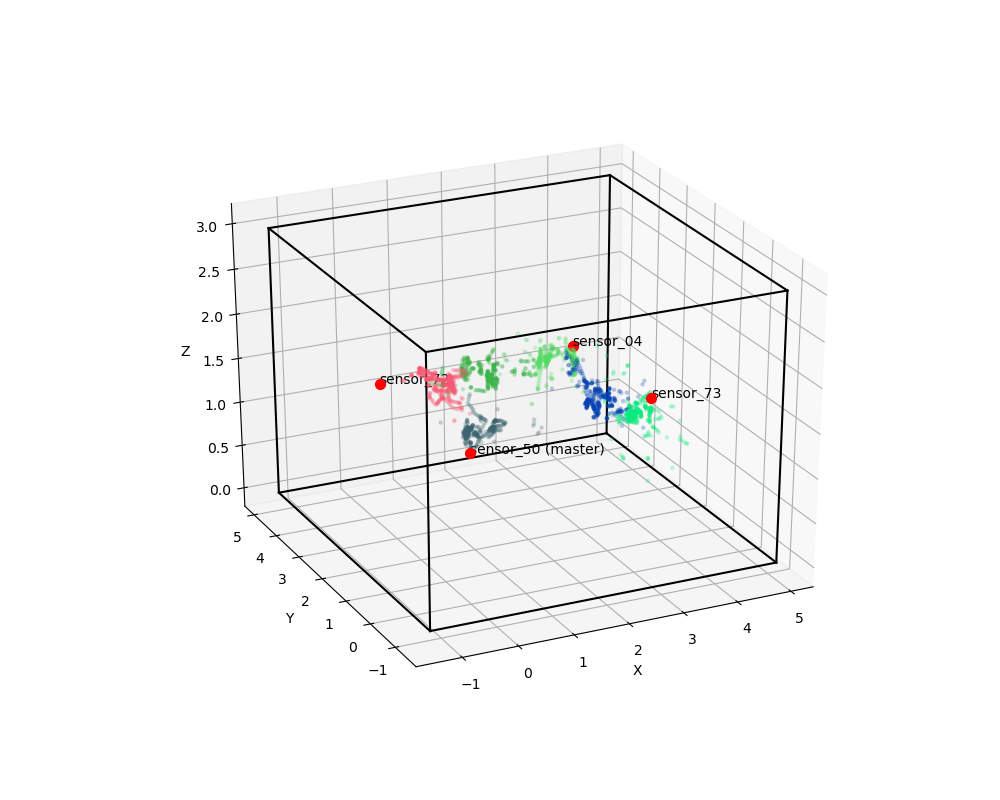

In [4]:
fig_1 = plt.figure(figsize=(10, 8))
ax = fig_1.add_subplot(111, projection='3d')
for s, e in combinations(np.concatenate([bottom, top]), 2):
    vector = s - e
    if(np.count_nonzero(vector) == 1):
        x, y, z = zip(s, e)
        ax.plot(x, y, z, color='k')
plt.show()

# Plot the location of sensors

50: (0.000, 0.000, 1.473) in meters, (0, 0, 58) in inches
<br/>73: (3.073,-0.356, 1.829) in meters, (121, -14, 72) in inches
<br/>04: (3.607, 3.607, 1.473) in meters, (142, 142, 58) in inches
<br/>72: (0.000, 3.607, 1.422) in meters, (0, 142, 56) in inches

In [5]:
sensors = {"50 (master)": (0.000, 0.000, 1.473),
           "73": (3.073,-0.356, 1.829),
           "04": (3.607, 3.607, 1.473),
           "72":  (0.000, 3.607, 1.422)}

for sensor in sensors:
    ax.scatter(sensors[sensor][0], sensors[sensor][1], sensors[sensor][2], s=50, color='red')
    ax.text(sensors[sensor][0], sensors[sensor][1], sensors[sensor][2], "sensor_" + sensor)

In [6]:
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

Text(0.5, 0, 'Z')

# UWB data preprocess

In [7]:
UWB_data = pd.read_csv("Room_417_fp.csv", names=["time", "x", "y", "z"])
UWB_data['time'] = pd.to_datetime(UWB_data.loc[:, 'time'], format="%m/%d/%y %H:%M:%S")
UWB_data.index = UWB_data['time']
UWB_data = UWB_data.iloc[:, 1:]
UWB_data = UWB_data.dropna()
UWB_data = UWB_data.astype(float)
UWB_data['locid'] = np.nan
UWB_data

,x,y,z,locid
time,,,,
2020-03-19 19:16:49,2.61862,-0.021077,1.345990,NaN
2020-03-19 19:16:49,2.64642,-0.024891,1.363450,NaN
2020-03-19 19:16:50,2.66861,-0.018742,1.366830,NaN
2020-03-19 19:16:50,2.52480,0.170694,1.182190,NaN
2020-03-19 19:16:50,2.55556,0.166401,1.182660,NaN
...,...,...,...,...
2020-03-19 19:45:54,2.84219,0.310398,1.000880,NaN
2020-03-19 19:45:55,2.83133,1.321560,1.414200,NaN
2020-03-19 19:45:55,2.87666,0.519938,1.060070,NaN


In [8]:
#ax.scatter(list(UWB_data['x']), list(UWB_data['y']), list(UWB_data['z']), s=5, color='k', alpha=0.2)

# BLE data preprocess

In [9]:
csv_file = "CSV_20200319_v2.csv"
BLE_data = pd.read_csv(csv_file, names=["num", "locid", "time", "uid", "rssi"])
BLE_data.rssi = BLE_data.rssi.astype(int)
BLE_data['time'] = csv_file.replace("CSV_", "").replace("_v2.csv", " ") + BLE_data['time'].astype(str)
BLE_data['time'] = pd.to_datetime(BLE_data['time'], format="%Y%m%d %H%M%S%f")
BLE_data

,num,locid,time,uid,rssi
0,1,fp001,2020-03-19 19:20:15.766,4ecf9feb4675,-68
1,1,fp001,2020-03-19 19:20:15.766,d2c889c50921,-76
2,1,fp001,2020-03-19 19:20:15.766,d3b9b43f91d4,-67
3,1,fp001,2020-03-19 19:20:15.766,4a3bd98b9fa1,-88
4,2,fp001,2020-03-19 19:20:19.065,4a3bd98b9fa1,-71
...,...,...,...,...,...
866,40,fp006,2020-03-19 19:45:14.149,4a3bd98b9fa1,-76
867,41,fp006,2020-03-19 19:45:18.972,d2c889c50921,-74
868,41,fp006,2020-03-19 19:45:18.972,d3b9b43f91d4,-69
869,41,fp006,2020-03-19 19:45:18.972,4a3bd98b9fa1,-79


In [10]:
BLE_data.locid.unique()

array(['fp001', 'fp002', 'fp003', 'fp004', 'fp005', 'fp006'], dtype=object)

# Visualize UWB location points

In [11]:
for time in UWB_data.index:
    for locid in BLE_data.locid.unique():
        time_min = BLE_data[BLE_data.locid == locid].time.min()
        time_max = BLE_data[BLE_data.locid == locid].time.max()
        if np.logical_and(time_min < time, time < time_max):
            UWB_data.loc[time, 'locid'] = locid
UWB_data = UWB_data.dropna()

for locid in BLE_data.locid.unique():
    temp = UWB_data[UWB_data['locid'] == locid]
    ax.scatter(list(temp['x']), list(temp['y']), list(temp['z']), s=5, color=np.random.rand(3,), alpha=0.2)

# Visualize BLE data fluctuation

In [12]:
beacon_color = {}
beacon_id = BLE_data.uid.unique()
for beacon in beacon_id:
    beacon_color[beacon] = np.random.rand(3,)
beacon_color

{'4ecf9feb4675': array([0.50342871, 0.69609104, 0.71546475]),
 'd2c889c50921': array([0.80735547, 0.24507789, 0.87868764]),
 'd3b9b43f91d4': array([0.31916634, 0.15094967, 0.34228302]),
 '4a3bd98b9fa1': array([0.72501229, 0.18018989, 0.71485591])}

<IPython.core.display.Javascript object>


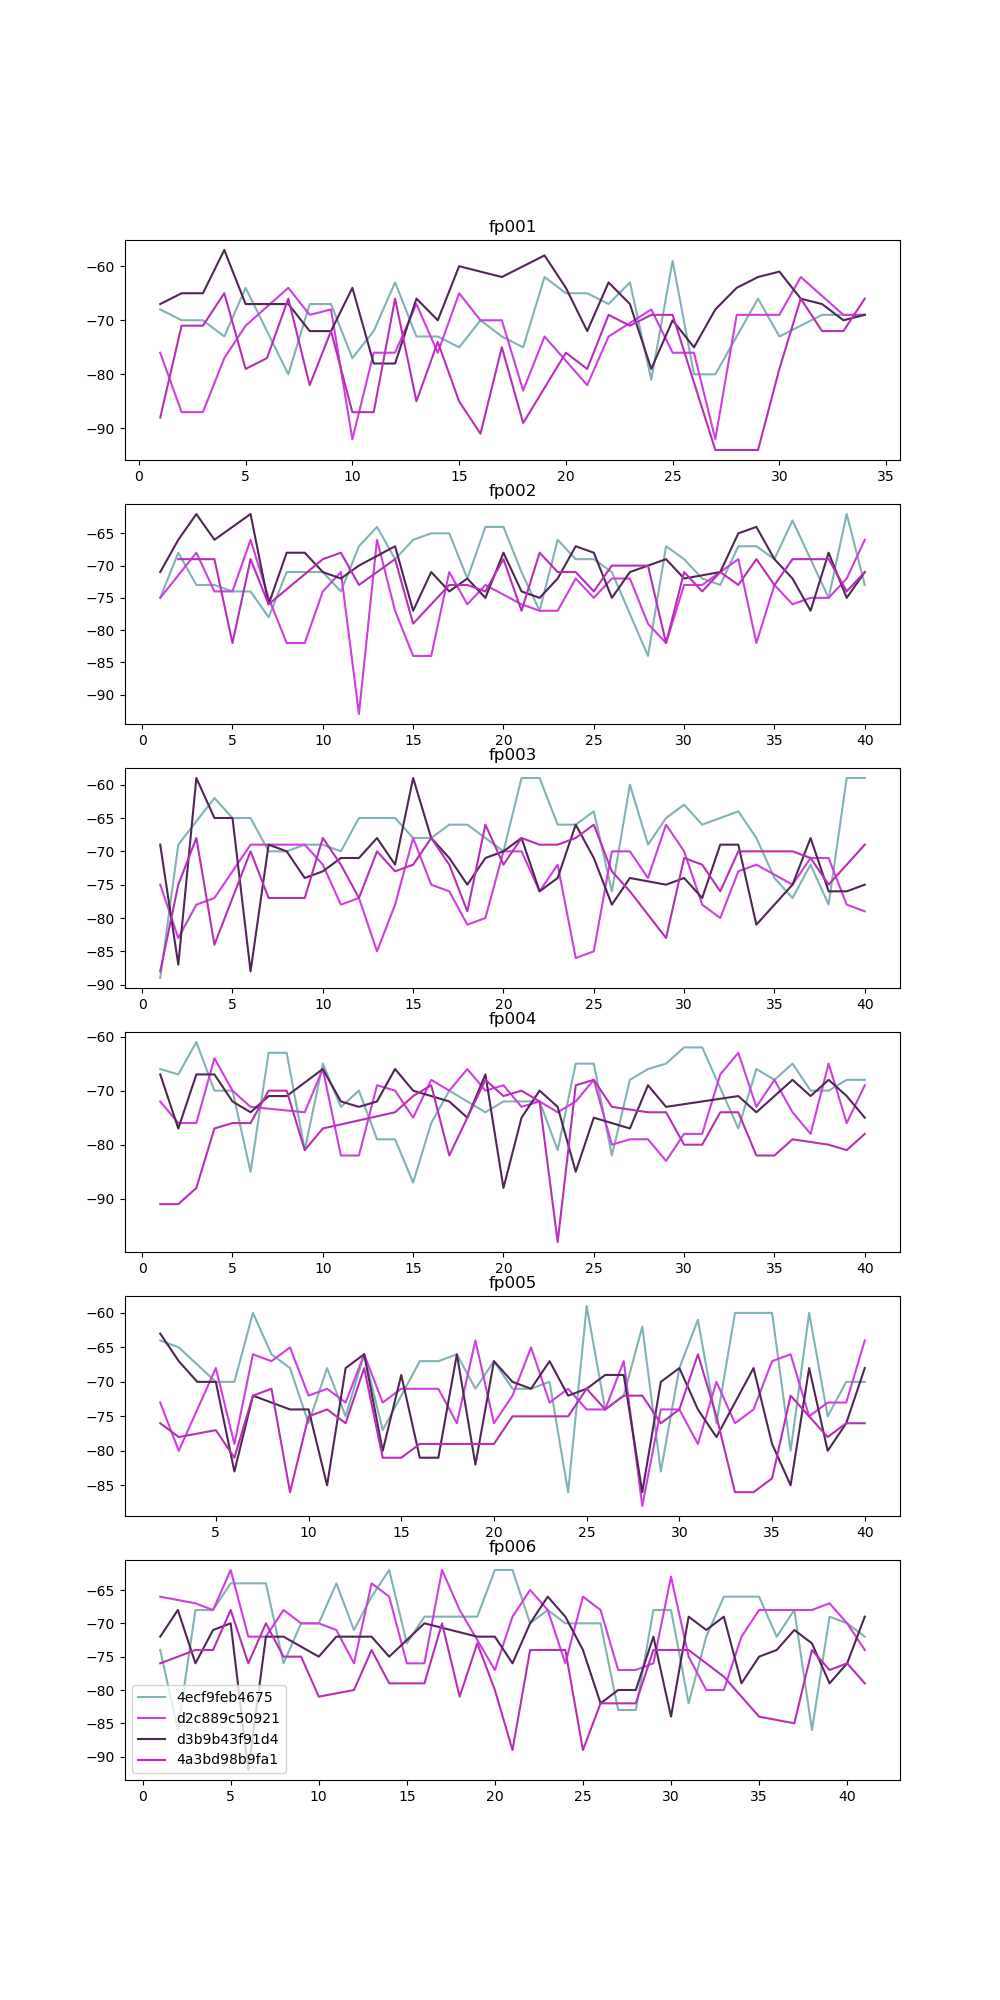

In [13]:
fig_2, axs = plt.subplots(6, 1, figsize=(10, 20))
ix = 0
for locid in BLE_data.locid.unique():
    temp = BLE_data[BLE_data.locid == locid]
    for beacon in beacon_id:
        beacon_subdf = temp[temp.uid == beacon]
        axs[ix].plot(beacon_subdf.num, beacon_subdf.rssi, label = beacon,color=beacon_color[beacon])
    axs[ix].set_title(locid)
    ix += 1
plt.legend()
plt.show()